<a href="https://colab.research.google.com/github/basapathitarun/cat-dog-image-classifiction/blob/main/image_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [14]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [16]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
#normaize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 104ms/step - loss: 1.3305 - accuracy: 0.5712 - val_loss: 0.6837 - val_accuracy: 0.5930
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6564 - accuracy: 0.6232 - val_loss: 1.0217 - val_accuracy: 0.5686
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6254 - accuracy: 0.6686 - val_loss: 0.5847 - val_accuracy: 0.7042
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.5624 - accuracy: 0.7188 - val_loss: 0.7107 - val_accuracy: 0.6330
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5277 - accuracy: 0.7480 - val_loss: 0.5168 - val_accuracy: 0.7550
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5093 - accuracy: 0.7624 - val_loss: 0.5199 - val_accuracy: 0.7558
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4960 - accuracy: 0.7724 - val_loss: 0.5475 - val_ac

In [42]:
import requests
import os

# URL of the image
url = 'https://i.pinimg.com/originals/27/53/82/275382880aefaed047c6f502b2430f31.jpg'
# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the filename from the URL
    filename = 'dog.jpg'

    # Save the image to a file
    with open(filename, "wb") as f:
        f.write(response.content)

    print("Image downloaded successfully.")
else:
    print("Failed to download image. Status code:", response.status_code)


Image downloaded successfully.


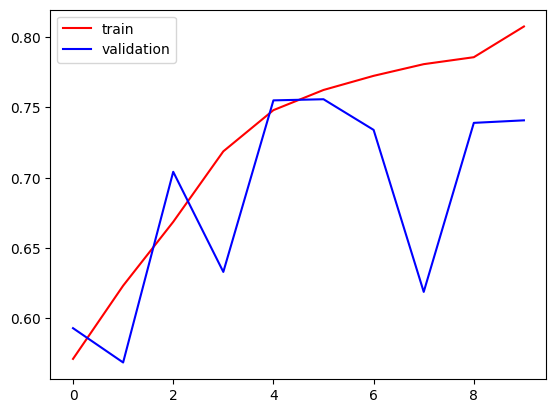

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

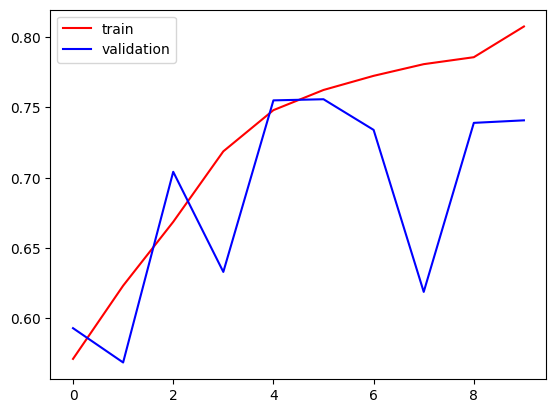

In [27]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [28]:
import cv2

In [36]:
test_img = cv2.imread('/content/cat.jpg')

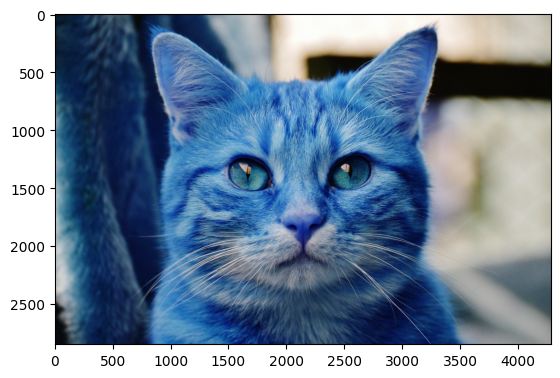

In [37]:
plt.imshow(test_img)

In [43]:
test_img = cv2.imread('/content/dog.jpg')

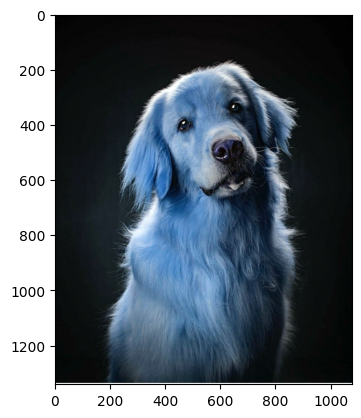

In [44]:
plt.imshow(test_img)

In [45]:
test_img.shape

(1341, 1078, 3)

In [46]:
test_img = cv2.resize(test_img,(256,256))

In [47]:
test_input = test_img.reshape((1,256,256,3))

In [48]:
model.predict(test_input)

1/1 [==============================] - 0s 48ms/step


array([[1.]], dtype=float32)